Nama : Livia<br>
NIM : 211351075<br>
Kelas : IF Pagi B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"livia07","key":"dd1ed4997e04a3176709a9d5da429608"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d bhavikjikadara/heart-failure-prediction

  0% 0.00/3.96k [00:00<?, ?B/s]
100% 3.96k/3.96k [00:00<00:00, 9.94MB/s]


In [4]:
!mkdir heart-failure-prediction
!unzip heart-failure-prediction.zip -d heart-failure-prediction
!ls heart-failure-prediction

Archive:  heart-failure-prediction.zip
  inflating: heart-failure-prediction/heart_failure_clinical_records.csv  
heart_failure_clinical_records.csv


# import library yang digunakan

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import graphviz
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

import pickle

# Data Discovery

In [6]:
df = pd.read_csv('/content/heart-failure-prediction/heart_failure_clinical_records.csv')

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.shape

(299, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [13]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA (minimal 5)

<Axes: >

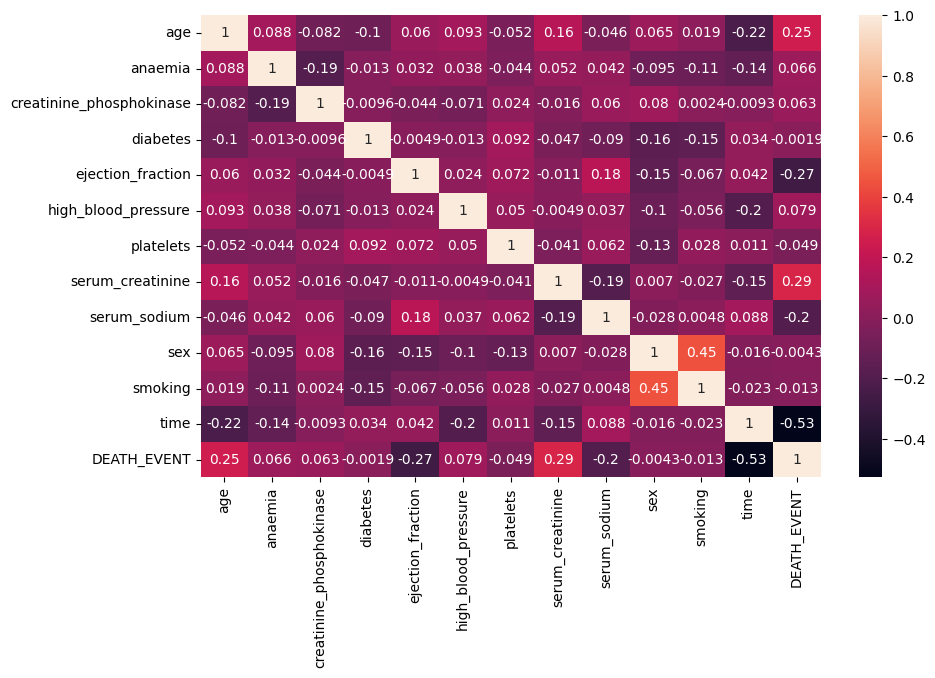

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

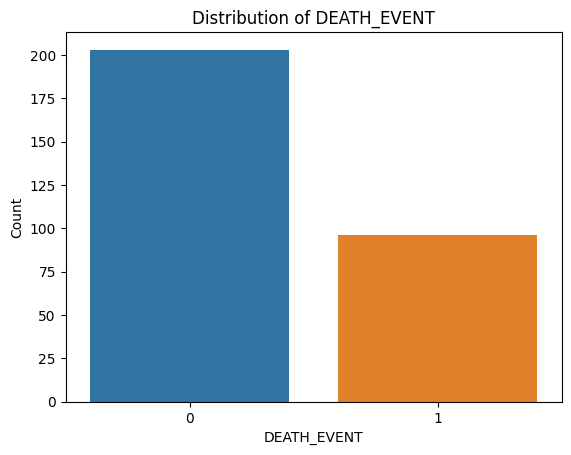

In [14]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')

plt.show()

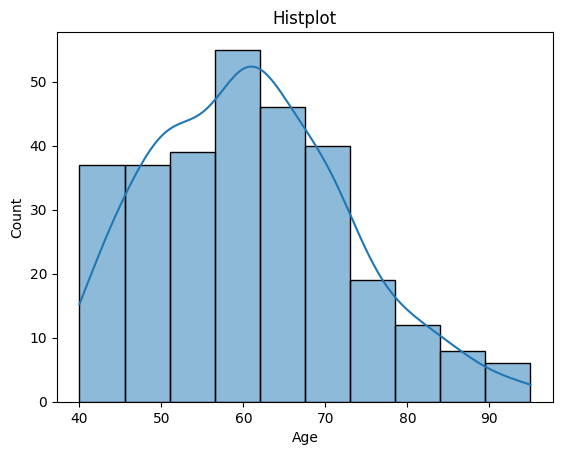

In [16]:
sns.histplot(data =df, x='age',kde=True)
plt.title('Histplot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
def draw_hist(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))

    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.histplot(x=column, data=df, ax=axs[row_index, col_index], alpha=0.5, kde=True)
        axs[row_index, col_index].set_title(f'Hist Plot of {column}')
    plt.tight_layout()
    plt.show()

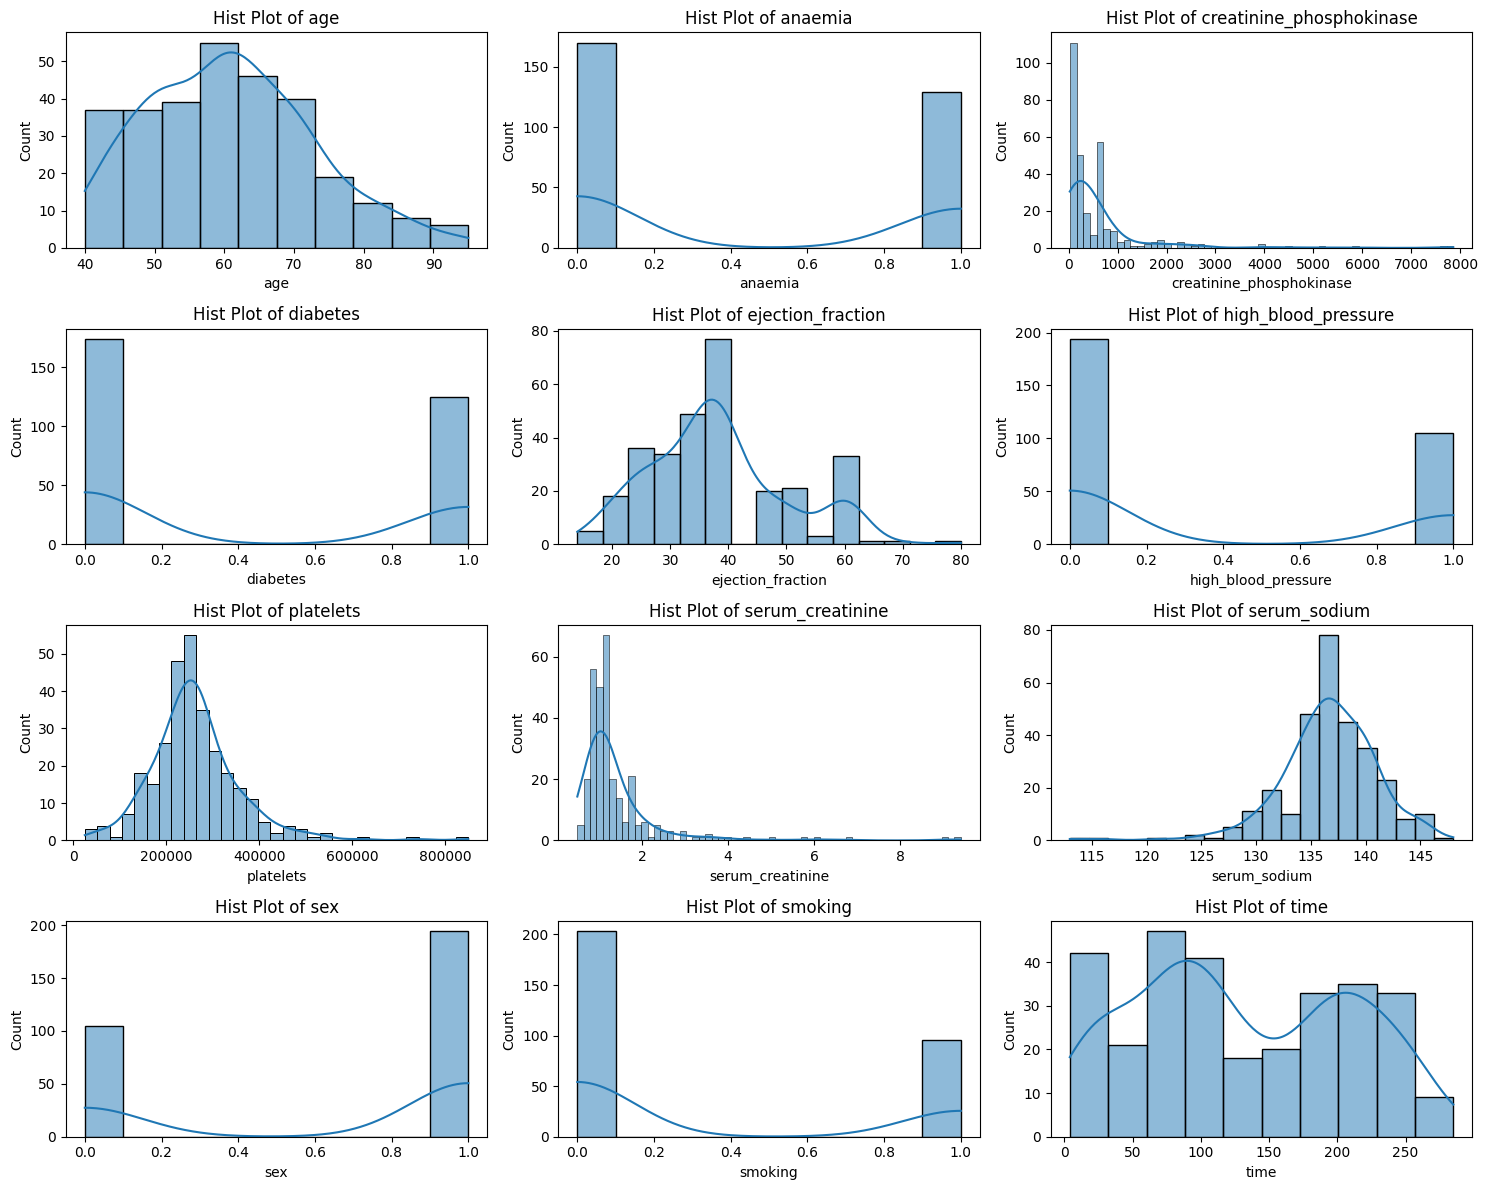

In [18]:
draw_hist(df)

Total number of Living case:- 203
Total number of Death case:- 96


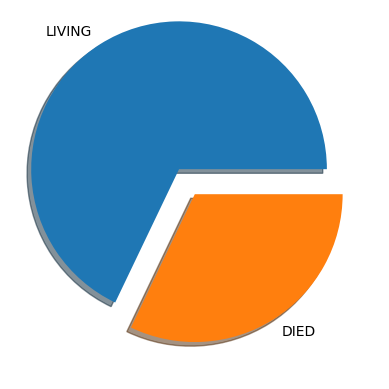

In [20]:
len_live = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 0])
len_death = len(df['DEATH_EVENT'][df['DEATH_EVENT'] == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING','DIED']

print(f'Total number of Living case:- {len_live}')
print(f'Total number of Death case:- {len_death}')

plt.pie(arr, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

Total number of Died with diabetes:- 40
Total number of Not died with diabetes: 118


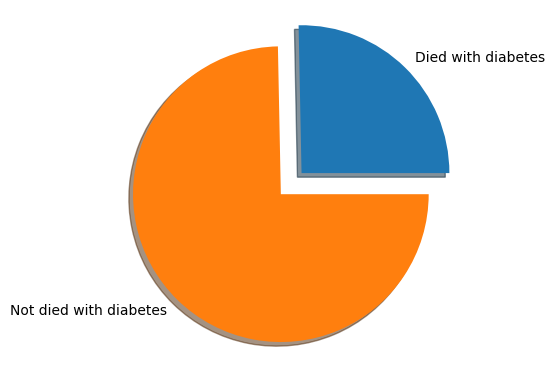

In [22]:
patient_nhave_diabetes_0 = df['DEATH_EVENT'][df.diabetes == 0][df.DEATH_EVENT ==0]
patient_have_diabetes_1 = df['DEATH_EVENT'][df.diabetes == 1][df.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with diabetes', 'Not died with diabetes']

print(f'Total number of Died with diabetes:- {len_d_died}')
print(f'Total number of Not died with diabetes: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

# Preprocessing

In [23]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [24]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [25]:
df["age"] = df["age"].astype(int)

In [26]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# modeling

In [28]:
X = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=7)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0,
    random_state=42, splitter='best'
)

model = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Data Train Accuracy = {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Data Test Accuracy = {dtc_acc} \n")

Data Train Accuracy = 0.89
Data Test Accuracy = 0.8484848484848485 



In [34]:
confusion_mat = confusion_matrix(y_test, y_pred)

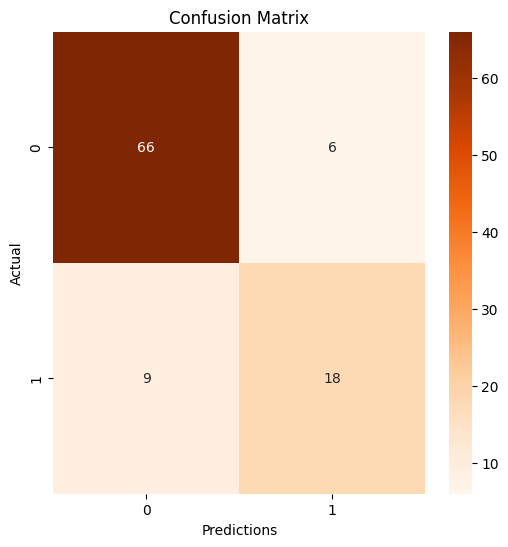

In [36]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Oranges", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

In [37]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [39]:
input_data = (75,0,582,0,20,1,265000.00,1.9,130,1,0,4)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('Tidak beresiko menyebabkan kematian')
else:
  print('Beresiko Menyebabkan Kematian')

[[ 1.14810864 -0.89543386 -0.04597844 -0.84225988 -1.52146132  1.42488702
  -0.01485084  0.33688295 -1.44714573  0.71774056 -0.7097601  -1.57096791]]
[1]
Beresiko Menyebabkan Kematian


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

In [43]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.4230769230769231, 0.875, 'x[11] <= -0.748\nentropy = 0.93\nsamples = 200\nvalue = [131, 69]'),
 Text(0.15384615384615385, 0.625, 'x[6] <= -0.537\nentropy = 0.627\nsamples = 51\nvalue = [8, 43]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.23076923076923078, 0.375, 'x[2] <= -0.538\nentropy = 0.764\nsamples = 36\nvalue = [8, 28]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.567\nsamples = 30\nvalue = [4, 26]'),
 Text(0.6923076923076923, 0.625, 'x[7] <= -0.248\nentropy = 0.668\nsamples = 149\nvalue = [123, 26]'),
 Text(0.5384615384615384, 0.375, 'x[11] <= -0.684\nentropy = 0.388\nsamples = 92\nvalue = [85, 7]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.312\nsamples = 89\nvalue = [84, 5]'),
 Text(0.8461538461538461, 0.375, 'x[6] <= -0.392\nentropy = 0.918\nsamples

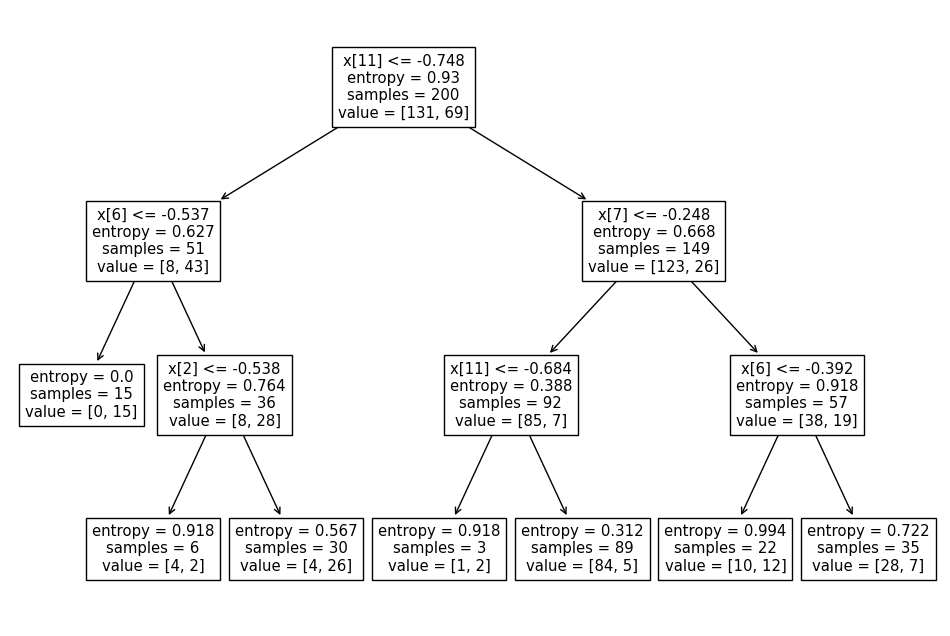

In [46]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train))

# save model (pickle)

In [47]:
filename = 'resiko_jantung.sav'
pickle.dump(model, open(filename,'wb'))